## METHODES DES DIFFERENCES FINIES POUR LES OPTIONS EUROPEENNES

Dans ce travail, on cherche une apporximation numérique de la fonction de prix d'un Put européen définie par : $\ v = v(t, s) \ $, $\ t \in [0, T] \ $, $\ s \in [0, S_{\text{max}}] \ $. Cette fonction satisfait l'EDP de Black Scholes définie sur le domaine  $\ \Omega = [S_{\text{min}}, S_{\text{max}}] \ $ comme suit :


\begin{cases}
\frac{\partial v}{\partial t} - \frac{\sigma^2}{2} s^2 \frac{\partial^2 v}{\partial s^2} - rs \frac{\partial v}{\partial s} + rv = 0, & t \in (0, T), s \in (S_{\text{min}}, S_{\text{max}}), \\
v(t, S_{\text{min}}) = v_\ell(t) \equiv Ke^{-rt} - S_{\text{min}}, & t \in (0, T), \\
v(t, S_{\text{max}}) = v_r(t) \equiv 0, & t \in (0, T), \\
v(0, s) = \phi(s) := (K - s)^+, & s \in (S_{\text{min}}, S_{\text{max}}).
\end{cases}

Dans la suite suppose que : $\ K = 100,  S_{\text{min}} = 0,  S_{\text{max}} = 200,  \sigma = 0.2,  r=0.1 \ $

Sur le domaine considéré, on considère le maillage ci-après. On pose $\ h := \frac{S_{\text{max}} - S_{\text{min}}}{I+1} \ $ et $\ \Delta t := \frac{T}{N} \ $, et  

\begin{cases}
s_j := S_{\text{min}} + jh, \quad j = 0, \dots, I+1 \quad \text{(maillage spaciale)} \\
t_n = n\Delta t, \quad n = 0, \dots, N \quad \text{(maillage en temps)}
\end{cases}

On cherche $\ U^n_j \ $, une approximation de $\ v(t_n, s_j) \ $. En particulier, on souhaite évaluer $\ v(t, s) \ $ au temps terminal $\ t = T \ $ pour ce faire on aura recours à plusieurs méthodes de différences finies.

In [1]:
import sys
import os
# Ajoute le chemin absolu vers le dossier 'src'
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)
    
# importation des bibliothèques nécessaires
from price_bs_pde import *

In [2]:
# Paramètres financiers globaux
r, sigma, K, T = 0.1, 0.2, 100, 1
Smin, Smax = 0, 200

# Configuration pour le calcul de l'ordre de convergence des schémas
I_vals = [10, 20, 40, 80, 160, 320]

# Initialisation
pricer = BlackScholesPricer(Smin=Smin, Smax=Smax, K=K, T=T, r=r, sigma=sigma)

### 1-SCHEMA D'EULER EXPLICITE
Dans un premier temps, on a recours au schéma d'euler explicite qui se décline comme suit : 
\begin{cases}
\frac{U^{n+1}_j - U^n_j}{\Delta t} + \frac{\sigma^2}{2} s_j^2 \frac{-U^n_{j-1} + 2U^n_j - U^n_{j+1}}{h^2} - r s_j \frac{U^n_{j+1} - U^n_{j-1}}{2h} + r U^n_j = 0  , \quad n = 0, \dots, N-1, \quad j = 1, \dots, I \\ 
U^n_0 = v_\ell(t_n) \equiv K e^{-r t_n} - S_{\text{min}}, \quad n = 0, \dots, N  \\
U^n_{I+1} = v_r(t_n) \equiv 0, \quad n = 0, \dots, N  \\
U^0_j = \phi(s_j) \equiv (K - s_j)^+, \quad j = 1, \dots, I 
\end{cases}

On choisit de travailler avec le vecteur inconnu $\ (v(t_n, s_j))_{j=1,\dots,I} \ $ :
$\
U^n =
\begin{pmatrix}
U^n_1 \\
\vdots \\
U^n_I
\end{pmatrix}.
\ $
On réécrit le système d'équation précédent sous forme matricielle comme suit : 

\begin{cases}
\frac{U^{n+1} - U^n}{\Delta t} + A U^n + q(t_n) = 0, \quad n = 0, \dots, N-1 \\
U^0 = (\phi(s_i))_{1 \leq i \leq I}
\end{cases}

On pose $\alpha_j := \frac{\sigma^2}{2} \frac{s_j^2}{h^2}, \quad \beta_j := \frac{r s_j}{2h}. \ $ On cherche alors $\ A \ $ et $\ q(t) \ $ tels que : $\alpha_i(-U^n_{i-1} + 2U^n_i - U^n_{i+1}) - \beta_i(U^n_{i+1} - U^n_{i-1}) + r U^n_i
= (-\alpha_i + \beta_i)U^n_{i-1} + (2\alpha_i + r)U^n_i + (-\alpha_i - \beta_i)U^n_{i+1}
\equiv (AU + q(t_n))_i. \ $

Par identification, on a : 
$\
A :=
\begin{bmatrix}
2\alpha_1 + r & -\alpha_1 - \beta_1 & 0 & \cdots & 0 \\
-\alpha_2 + \beta_2 & 2\alpha_2 + r & -\alpha_2 - \beta_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
0 & \cdots & -\alpha_I + \beta_I & 2\alpha_I + r
\end{bmatrix}.
\ $

Et $\ q(t_n) \ $ contient les valeurs aux bornes $\ U^n_0 = v_\ell(t_n) \ $ et $\ U^n_{I+1} = v_r(t_n) \ $ et est défini comme suit :
\begin{cases}
q(t_n) :=
\begin{pmatrix}
(-\alpha_1 + \beta_1)U^n_0 \\
0 \\
\vdots \\
0 \\
(-\alpha_I - \beta_I)U^n_{I+1}
\end{pmatrix}
\equiv
\begin{pmatrix}
(-\alpha_1 + \beta_1)v_\ell(t_n) \\
0 \\
\vdots \\
0 \\
(-\alpha_I - \beta_I)v_r(t_n)
\end{pmatrix}.
\end{cases}

Le grahique ci-dessous montre une première approximation du prix du Put européen grâce au schéma d'Euler Explicit. 

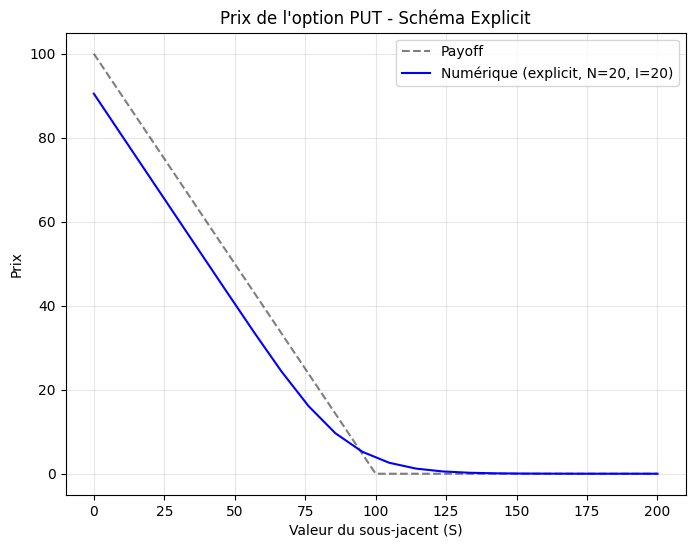

In [3]:
plot_single_result(pricer,N=20, I=20, method='explicit')

#### 1.1-Tests numériques sur le schéma d'Euler explicite
##### a-1 On fixe N = 10 et on fait varier I = 10, 20, 50, 100

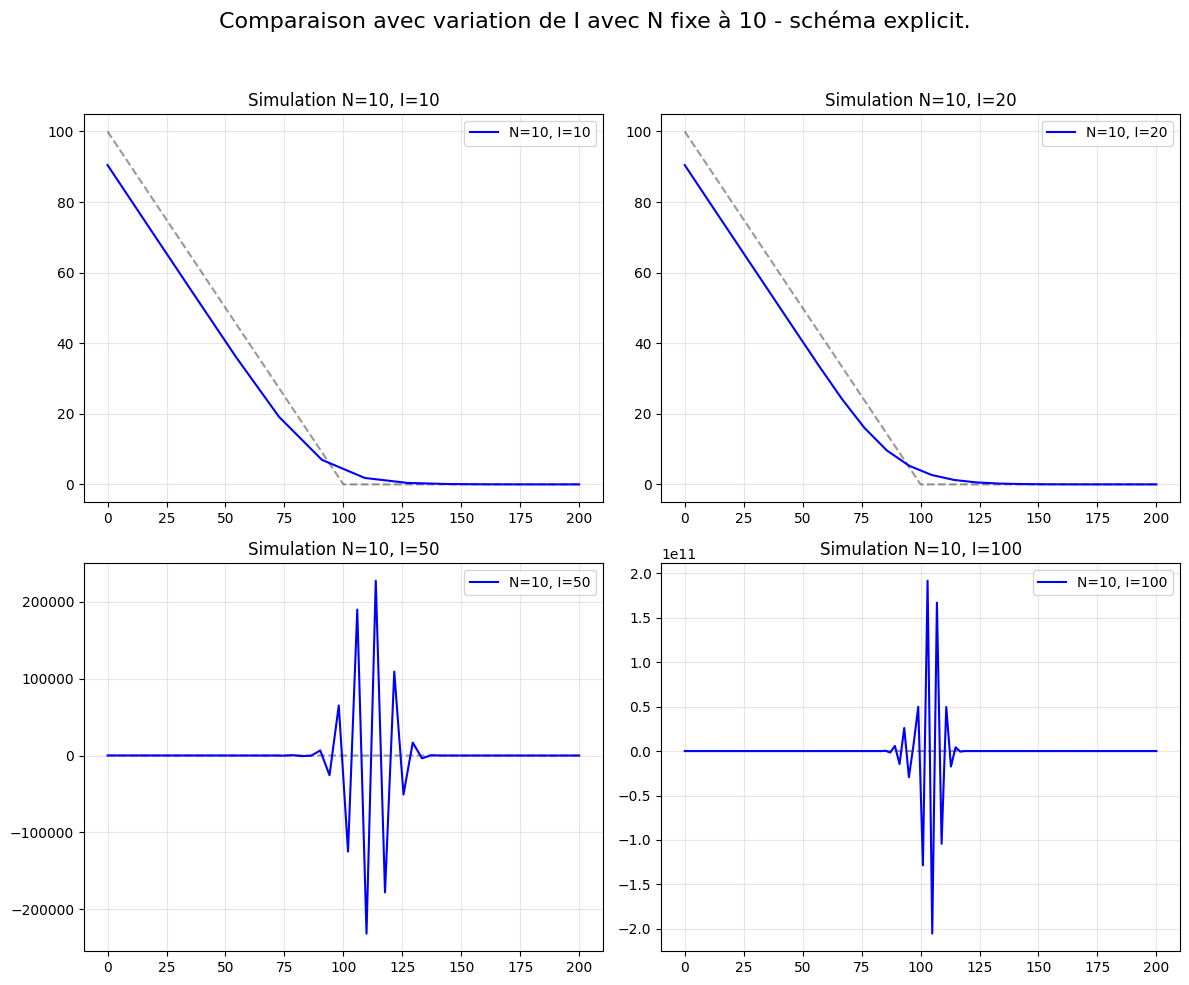

In [4]:
params = [(10, 10), (10, 20), (10, 50), (10, 100)]
plot_four_graphs(pricer, params, method='explicit', title="Comparaison avec variation de I avec N fixe à 10 -")

#### a-2) On fixe N = I et on fait varier I = 10, 20, 50, 100

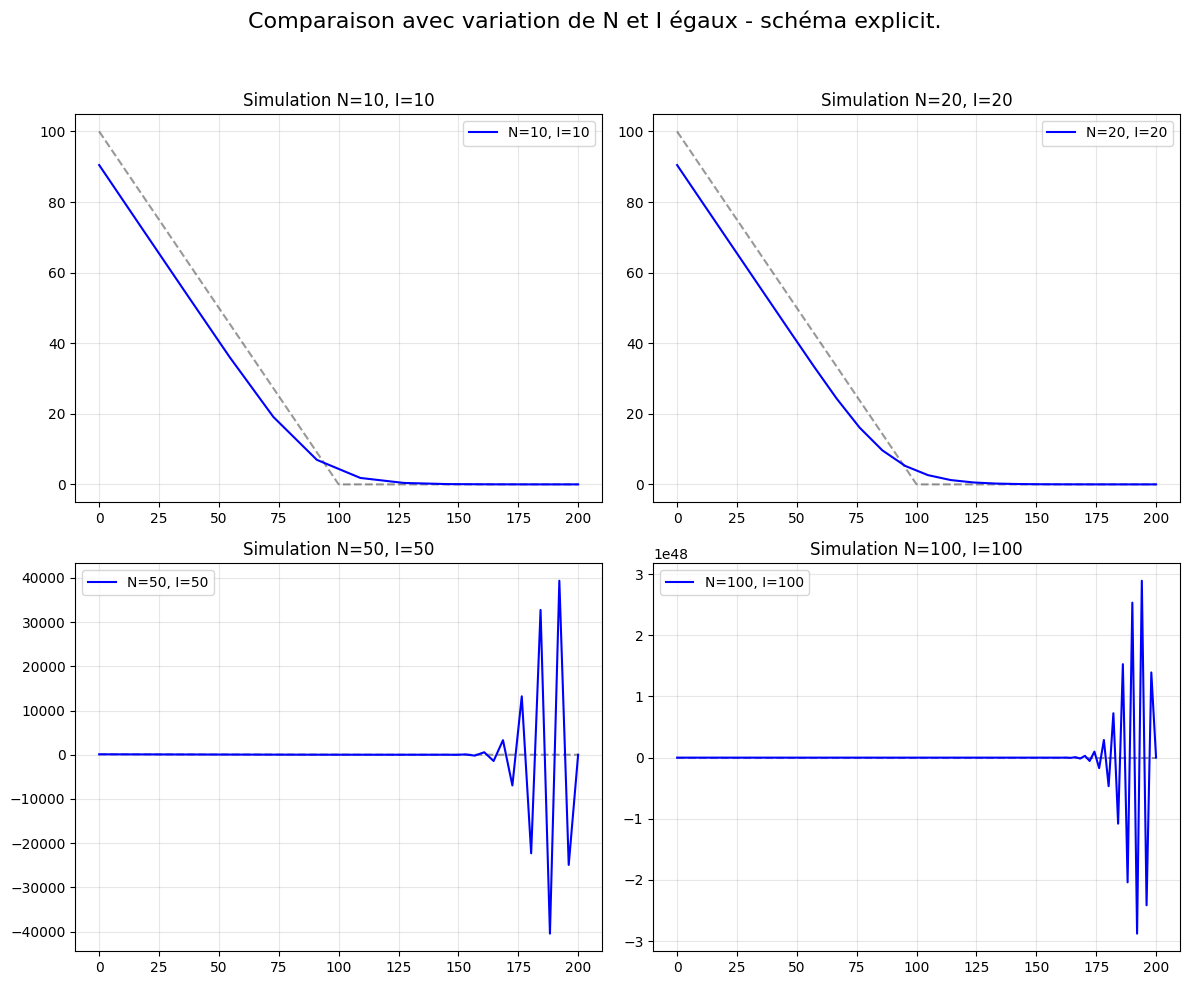

In [5]:
params = [(i, i) for i in [10, 20, 50, 100]]
plot_four_graphs(pricer, params, method='explicit', title="Comparaison avec variation de N et I égaux -")

**Commentaire:** On observe grâce aux graphiques avec N fixe et N=I que le schéma d'Euler explicite n'est pas numéricalement stable. En effet, après un nombre fini d'itérations on remarque que la norme du vecteur des approximations $\ U^n \ $ explose. Aussi  $\ U^n_j \ $ (l'approximation de $\ v(t_n, s_j) \ $) n'a pas toujours des valeurs positives, ce que l'on souhaiterait éviter. Aussi, en regardant le graphique 1, on conclut que lorsque le nombre de pas de temps est faible (petite valeur de N), à mesure que le maillage en espace comporte plus de points (I grand) le schéma d'Euler explicite devient instable. Le graphique 2 montre que l'instabilité persiste quand N et I évoluent en étant égaux. Il semble nécessaire lorsque I augmente de considérer des valeurs de N beaucoup plus importantes. Le schéma d'euler explicite semble nécessiter un maillage plus fin en temps pour être stable numériquement.

#### b) Compréhension de l'origine des oscillations et des explosions observées
Pour ce faire, on va s'intéresser à la matrice d'amplification définie comme suit  : $B := I_d - \Delta tA $. On sait que le schéma d'Euler peut être programmé en utilisant l'équation récursive ci-après : $U^{n+1} = U^n - \Delta t (A U^n + q(t_n)) $. Cette équation peut être réécrite sous la forme suivante : $U^{n+1} = (I_d - \Delta tA)U^n + \Delta tq(t_n)) = BU^n + \Delta tq(t_n)) $. On comprend que toute oscillation ou explosion dans les approximations est due à la matrice $B $. 

#### Premier cas N=10 ert I=50

In [6]:
#On récupére la matrice A pour ces valeurs de N et I
_, _, A = pricer.solver(10, 50, method='explicit')
I_d = np.eye(50)
B = I_d - (1/10)*A
#On extrait ensuite la diagonale de B 
np.diag(B)

array([ 0.986,  0.974,  0.954,  0.926,  0.89 ,  0.846,  0.794,  0.734,
        0.666,  0.59 ,  0.506,  0.414,  0.314,  0.206,  0.09 , -0.034,
       -0.166, -0.306, -0.454, -0.61 , -0.774, -0.946, -1.126, -1.314,
       -1.51 , -1.714, -1.926, -2.146, -2.374, -2.61 , -2.854, -3.106,
       -3.366, -3.634, -3.91 , -4.194, -4.486, -4.786, -5.094, -5.41 ,
       -5.734, -6.066, -6.406, -6.754, -7.11 , -7.474, -7.846, -8.226,
       -8.614, -9.01 ])

In [7]:
lng.norm(B, np.inf)

np.float64(18.218000000000004)

In [8]:
lng.norm(B, 2)

np.float64(16.4739760442933)

**Commentaire:** En se restreignant à la diagonale de la matrice pour ces valeurs de N et de I, on observe que les coefficients de celle-ci ne sont pas tous positifs et que plusieurs des éléments diagonaux sont en valeur absolue supérieur à 1. Ces coefficients négatifs et la norme élevée de la matice explique les oscillations observées au graphique 1.  

#### Deuxième cas N=10 ert I=10

In [9]:
_, _, A = pricer.solver(10, 10, method='explicit')
I_d = np.eye(10)
B = I_d - (1/10)*A
B

array([[ 0.986,  0.007,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [-0.002,  0.974,  0.018,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.   ,  0.003,  0.954,  0.033,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.012,  0.926,  0.052,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.025,  0.89 ,  0.075,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.042,  0.846,  0.102,  0.   ,
         0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.063,  0.794,  0.133,
         0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.088,  0.734,
         0.168,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.117,
         0.666,  0.207],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.15 ,  0.59 ]])

**Commentaire:** On observe que dans ce cas-ci la matrice d'amplification a ses coefficients qui sont presques tous positifs et de valeur abolue inférieure à 1. On remarque aussi que dans ce cas le schéma d'Euler se comporte bien.  

#### c) Calcul des valeurs CFL 
Elles sont définies par :  $\mu := \frac{\Delta t}{h^2}\sigma^2 S^2_{max} $

In [10]:
# Pour N = 10 et I = 10
N, I = 10, 10
mu1 = (pricer.T/N)*(1/((pricer.Smax-pricer.Smin)/(I+1)))*(pricer.sigma**2)*(pricer.Smax**2)
mu1

8.8

In [11]:
# Pour N = 10 et I = 50
N, I = 10, 50
mu2 = (pricer.T/N)*(1/((pricer.Smax-pricer.Smin)/(I+1)))*(pricer.sigma**2)*(pricer.Smax**2)
mu2

40.80000000000001

**Commentaire:** En comparant ces deux valeurs, on constate que dans le premier cas, la valeur CFL est faible. Il s'agit aussi du cas où le schema d'Euler explicite se comporte bien. On en déduit que plus le CFL est petit plus le schéma est stable.  

#### d) et e) Ordre du schéma d'Euler Explicite.

In [12]:
# Génération et affichage
data_explicite = generate_convergence_data(
    pricer, 
    I_values=I_vals, 
    S_val=80, 
    method='explicit', 
    n_factor_func=lambda I: I**2 // 10
)

display_convergence_table(data_explicite, title="CONVERGENCE EULER EXPLICITE")


--- CONVERGENCE EULER EXPLICITE ---
I      N        U(s)            errex           tcpu            alpha           error_succ     
-----------------------------------------------------------------------------------------------
10     10       14.255092       0.981429        0.000203        N/A             N/A            
20     40       13.547634       0.273971        0.000227        1.973300        0.707459       
40     160      13.345106       0.071443        0.000963        2.009007        0.202528       
80     640      13.291930       0.018267        0.004366        2.002965        0.053175       
160    2560     13.278284       0.004621        0.017695        2.000790        0.013646       
320    10240    13.274825       0.001162        0.052822        2.000216        0.003459       


**Commentaire:** Le tableau ci-dessus permet de voir que le schema d'Euler explicite présente une certaine stabilité à mesure que I et N évolue (avec N proportionnel au carré de I). Les valeurs de alpha montre aussi que ce schéma est d'ordre 2 en la variable s . 

### 2-SCHEMA D'EULER Implicite

De ce qui précède on a vu que le schéma d'Euler explicite présente une instabilité numérique en fonction maillage considéré. On observe en effet, une explosion et des oscillations dans les résultats de ce schéma dû à la matrice d'amplification. On a constaté que l'instabilité pouvait être corrigée en considérant N et I tels que N soit proportionnel au carré de I. Toutefois, une telle approche est très coûteuse en termes d'itérations. Pour y rémédier on va donc implémenter le schéma d'Euler implicite qui est définit de façon récursive par les équations ci-après : 

\begin{cases}
\frac{U^{n+1}_j - U^n_j}{\Delta t} + \frac{\sigma^2}{2} s_j^2 \frac{-U^{n+1}_{j-1} + 2U^{n+1}_j - U^{n+1}_{j+1}}{h^2} - r s_j \frac{U^{n+1}_{j+1} - U^{n+1}_{j-1}}{2h} + r U^{n+1}_j = 0  , \quad n = 0, \dots, N-1, \quad j = 1, \dots, I \\ 
U^{n+1}_0 = v_\ell(t_{n+1}) \equiv K e^{-r t_{n+1}} - S_{\text{min}}, \quad n = 0, \dots, N-1  \\
U^n_{I+1} = v_r(t_{n+1}) \equiv 0, \quad n = 0, \dots, N-1  \\
U^0_j = \phi(s_j) \equiv (K - s_j)^+, \quad j = 1, \dots, I 
\end{cases}

On travaille avec le même vecteur inconnu $\ (v(t_n, s_j))_{j=1,\dots,I} \ $ :
$\
U^n =
\begin{pmatrix}
U^n_1 \\
\vdots \\
U^n_I
\end{pmatrix}.
\ $
On peut réécrire le système d'équation sous forme matricielle comme suit : 

\begin{cases}
\frac{U^{n+1} - U^n}{\Delta t} + A U^{n+1} + q(t_{n+1}) = 0, \quad n = 0, \dots, N-1 \\
U^0 = (\phi(s_i))_{1 \leq i \leq I}
\end{cases}

#### a) Stabilité du schéma d'Euler Implicite

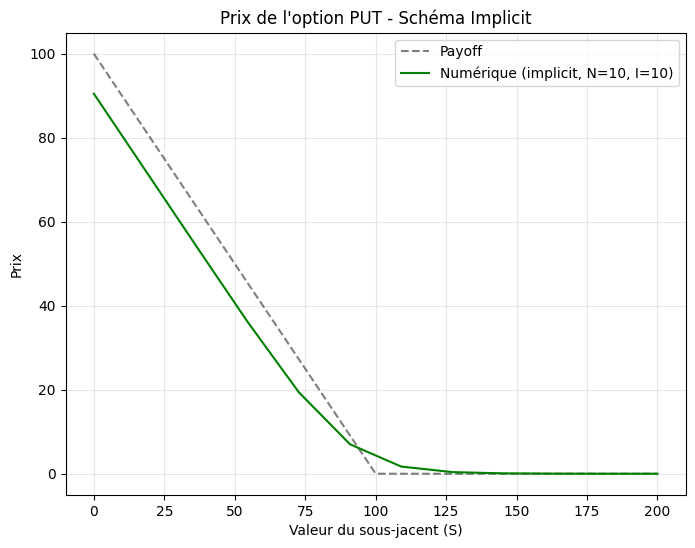

In [13]:
plot_single_result(pricer,N=10, I=10, method='implicit')

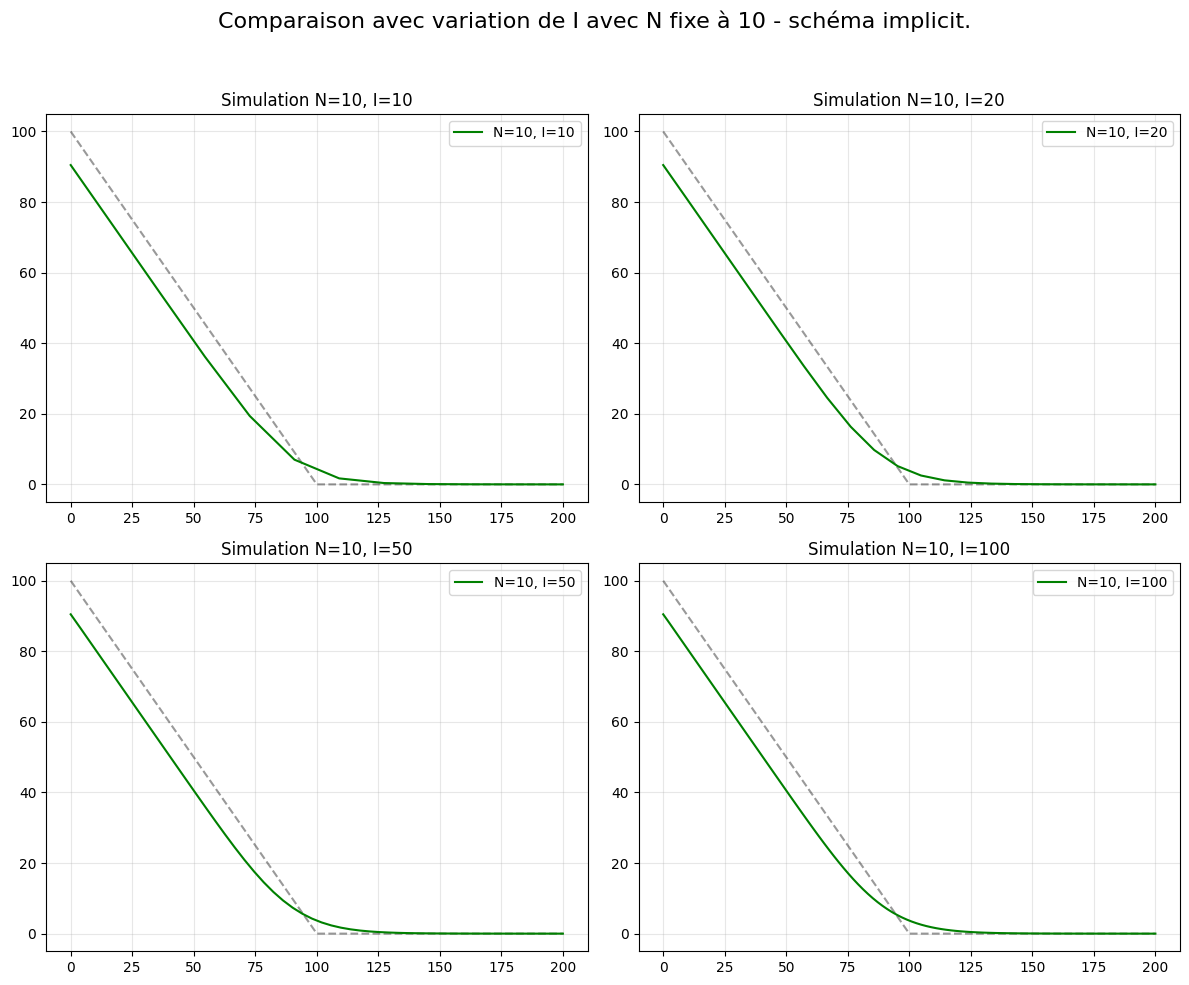

In [14]:
params = [(10, 10), (10, 20), (10, 50), (10, 100)]
plot_four_graphs(pricer, params, method='implicit', title="Comparaison avec variation de I avec N fixe à 10 -")

**Commentaire:** Le graphique ci-dessus permet de constater que le schéma d'Euler implicite ne pose aucun problème de stabilité. En effet, on observe aucune oscillation ou explosion. Le schéma semble bien approcher le payoff du Put européen. 

#### b) Ordre du schéma d'Euler implicite

In [15]:
# Génération et affichage
data_implicite = generate_convergence_data(
    pricer, 
    I_values=I_vals, 
    S_val=80, 
    method='implicit', 
    n_factor_func=lambda I: I // 10
)

display_convergence_table(data_implicite, title="CONVERGENCE EULER IMPLICITE AVEC N=I/10")


--- CONVERGENCE EULER IMPLICITE AVEC N=I/10 ---
I      N        U(s)            errex           tcpu            alpha           error_succ     
-----------------------------------------------------------------------------------------------
10     1        15.115616       1.841953        0.000404        N/A             N/A            
20     2        14.135687       0.862024        0.000162        1.174245        0.979929       
40     4        13.667824       0.394161        0.001068        1.169606        0.467863       
80     8        13.456693       0.183030        0.000781        1.126652        0.211131       
160    16       13.360985       0.087322        0.002283        1.077291        0.095708       
320    32       13.316197       0.042534        0.017551        1.042412        0.044788       


In [16]:
# Génération et affichage
data_implicite = generate_convergence_data(
    pricer, 
    I_values=I_vals, 
    S_val=80, 
    method='implicit', 
    n_factor_func=lambda I: I 
)

display_convergence_table(data_implicite, title="CONVERGENCE EULER IMPLICITE AVEC N=I")


--- CONVERGENCE EULER IMPLICITE AVEC N=I ---
I      N        U(s)            errex           tcpu            alpha           error_succ     
-----------------------------------------------------------------------------------------------
10     10       14.448406       1.174743        0.000654        N/A             N/A            
20     20       13.642159       0.368496        0.000821        1.792956        0.806247       
40     40       13.386145       0.112482        0.004747        1.773621        0.256015       
80     80       13.310502       0.036839        0.009809        1.639391        0.075642       
160    160      13.287066       0.013403        0.025068        1.471804        0.023436       
320    320      13.279089       0.005426        0.078337        1.310471        0.007977       


**Commentaire:** Les deux tableaux ci-dessus montrent que le schéma d'Euler implicite est stable numériquement. Aussi les résultats du premier suggère qu'il n'est pas nécessaire des valeurs de N proportionnelles au carré de I pour assurer la stabilité du schéma. Toutefois en comparant les colonnes alpha des deux tableaux on peut voir que l'ordre théorique du schéma d'Euler implicite qui est de 2, se précise à mesure que le maillage en temps s'affine. 

### 3-SCHEMA DE CRANK NICOLSON
On a pu constater que le schéma d'Euler Implicite se comporte plutôt bien. Il est stable numériquement mais l'ordre du schéma se vérifie numériquement pour de grande valeur de N. A présent on s'intéresse au schéma de CRANK NICOLSON qui est définit de façon récursive par les équations ci-après : 
\begin{cases}
\frac{U^{n+1}_j - U^n_j}{\Delta t} + \frac{1}{2} (-\frac{\sigma^2}{2} s_j^2 \frac{U^{n+1}_{j-1} - 2U^{n+1}_j + U^{n+1}_{j+1}}{h^2} - r s_j \frac{U^{n+1}_{j+1} - U^{n+1}_{j-1}}{2h} + r U^{n+1}_j) + \frac{1}{2} (-\frac{\sigma^2}{2} s_j^2 \frac{U^{n}_{j-1} - 2U^{n}_j + U^{n}_{j+1}}{h^2} - r s_j \frac{U^{n}_{j+1} - U^{n}_{j-1}}{2h} + r U^{n}_j) = 0  , \quad n = 0, \dots, N-1, \quad j = 1, \dots, I \\ 
U^{n+1}_0 = v_\ell(t_{n+1}) \equiv K e^{-r t_{n+1}} - S_{\text{min}}, \quad n = 0, \dots, N-1  \\
U^n_{I+1} = v_r(t_{n+1}) \equiv 0, \quad n = 0, \dots, N-1  \\
U^0_j = \phi(s_j) \equiv (K - s_j)^+, \quad j = 1, \dots, I 
\end{cases}

On travaille avec le même vecteur inconnu $\ (v(t_n, s_j))_{j=1,\dots,I} \ $ :
$\
U^n =
\begin{pmatrix}
U^n_1 \\
\vdots \\
U^n_I
\end{pmatrix}.
\ $
On peut réécrire le système d'équation sous forme matricielle comme suit : 

\begin{cases}
\frac{U^{n+1} - U^n}{\Delta t} + A (\frac{U^{n+1} + U^{n}}{2}) + q(t_{n+1}) + q(t_{n}) = 0, \quad n = 0, \dots, N-1 \\
U^0 = (\phi(s_i))_{1 \leq i \leq I}
\end{cases}

#### a) Stabilité du schéma

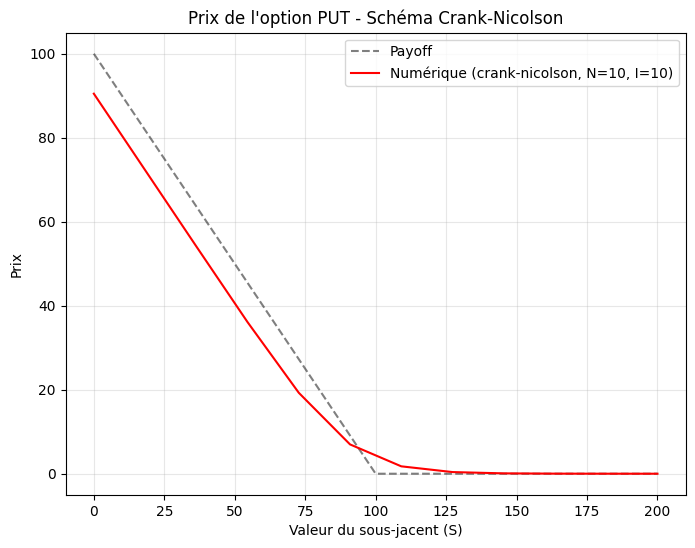

In [17]:
plot_single_result(pricer, N=10, I=10, method='crank-nicolson')

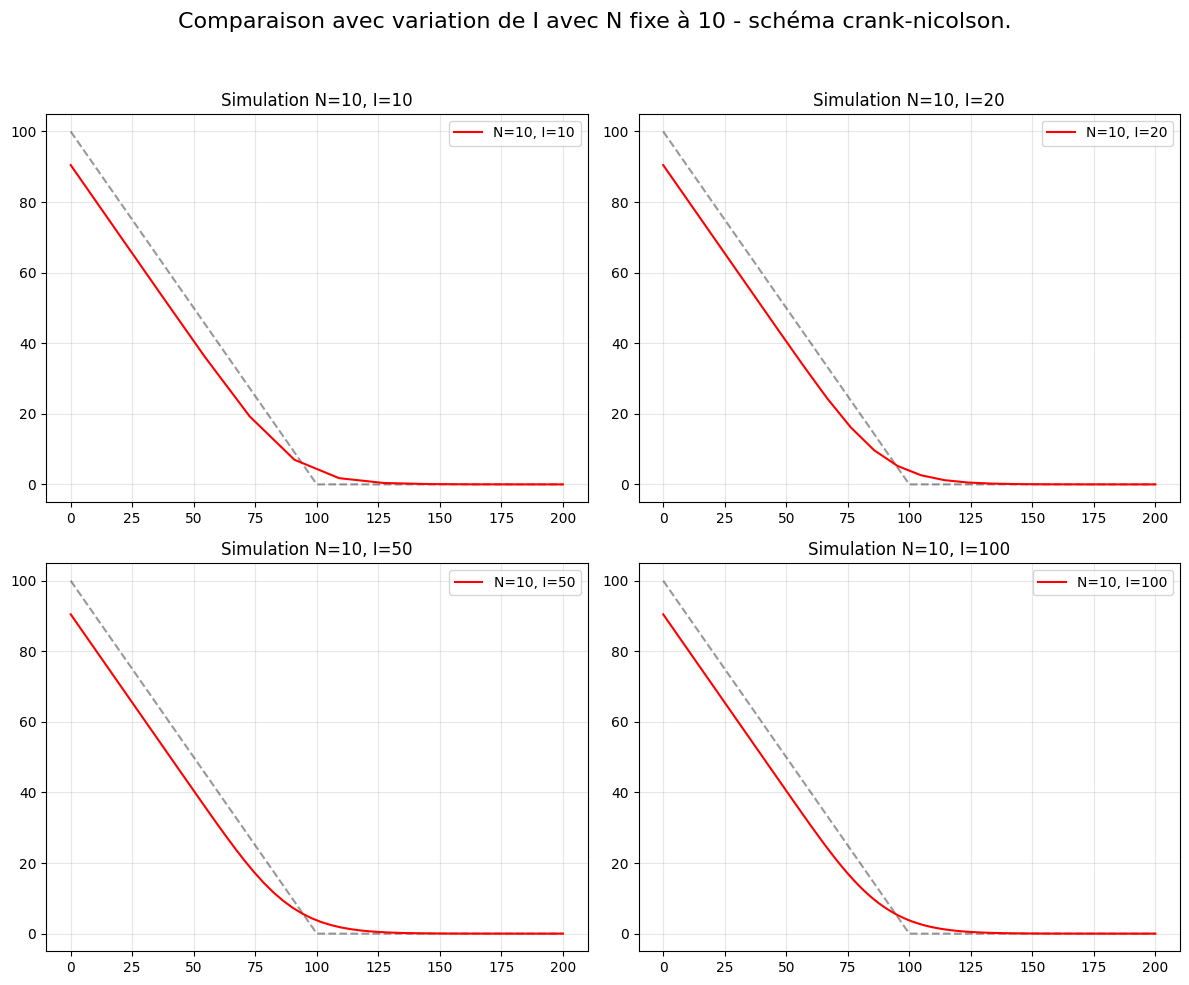

In [18]:
plot_four_graphs(pricer,params, method='crank-nicolson', title="Comparaison avec variation de I avec N fixe à 10 -")

**Commentaire:** Les graphiques ci-dessus relatifs au schéma de CRANK NICOLSON suggèrent que ce dernier est stable numériquement. Comme pour Euler implicite, il ne présente en effet pas d'explosion ou d'oscillation. 

#### b) Ordre du schéma de CRANK NICOLSON.

In [19]:
# Génération et affichage
data_cn = generate_convergence_data(
    pricer, 
    I_values=I_vals, 
    S_val=80, 
    method='crank-nicolson', 
    n_factor_func=lambda I: I 
)

display_convergence_table(data_cn, title="CONVERGENCE CRANK-NICOLSON AVEC N=I")


--- CONVERGENCE CRANK-NICOLSON AVEC N=I ---
I      N        U(s)            errex           tcpu            alpha           error_succ     
-----------------------------------------------------------------------------------------------
10     10       14.353451       1.079788        0.000651        N/A             N/A            
20     20       13.578892       0.305229        0.000803        1.953920        0.774559       
40     40       13.353140       0.079477        0.003155        2.011209        0.225752       
80     80       13.293944       0.020281        0.006721        2.005878        0.059195       
160    160      13.278788       0.005125        0.021258        2.002416        0.015156       
320    320      13.274951       0.001288        0.102650        2.001060        0.003837       


In [20]:
# Génération et affichage
data_cn = generate_convergence_data(
    pricer, 
    I_values=I_vals, 
    S_val=80, 
    method='crank-nicolson', 
    n_factor_func=lambda I: I // 10
)

display_convergence_table(data_cn, title="CONVERGENCE CRANK-NICOLSON AVEC N=I/10")


--- CONVERGENCE CRANK-NICOLSON AVEC N=I/10 ---
I      N        U(s)            errex           tcpu            alpha           error_succ     
-----------------------------------------------------------------------------------------------
10     1        14.230461       0.956798        0.000304        N/A             N/A            
20     2        13.506181       0.232518        0.000290        2.187701        0.724281       
40     4        13.334783       0.061120        0.001416        1.997041        0.171397       
80     8        13.288798       0.015135        0.003565        2.050009        0.045985       
160    16       13.277492       0.003829        0.005378        2.000797        0.011307       
320    32       13.274627       0.000964        0.018393        1.999440        0.002865       


**Commentaire:** Le graphique et les deux tableaux relatifs au schéma de CRANK NICOLSON suggèrent que ce dernier est stable numériquement. Comme pour Euler implicite, il ne présente en effet pas d'explosion ou d'oscillation. Plus le maillage en temps est épais, plus ce schéma semble vite converger.

#### f) Version sparse de Crank Nicolson
Dans cette section on essaye d'optimiser le temps d'exécution des schémas en ne calculant ue les termes non nuls de la matrice A qui apprait à chaque fois dans les équations récursives des différents schémas. On le fait en particulier pour le chéma de crank Nicolson qui est le meilleur des trois que nous avons programmés, car il est d'ordre 2 aussi bien en temps qu'en espace.

In [21]:
# Génération et affichage
data_cn = generate_convergence_data(
    pricer, 
    I_values=I_vals, 
    S_val=80, 
    method='crank-nicolson', 
    use_sparse=True,
    n_factor_func=lambda I: I 
)

display_convergence_table(data_cn, title="CONVERGENCE CRANK-NICOLSON AVEC N=I")


--- CONVERGENCE CRANK-NICOLSON AVEC N=I ---
I      N        U(s)            errex           tcpu            alpha           error_succ     
-----------------------------------------------------------------------------------------------
10     10       14.353451       1.079788        0.005620        N/A             N/A            
20     20       13.578892       0.305229        0.006085        1.953920        0.774559       
40     40       13.353140       0.079477        0.006106        2.011209        0.225752       
80     80       13.293944       0.020281        0.010986        2.005878        0.059195       
160    160      13.278788       0.005125        0.019936        2.002416        0.015156       
320    320      13.274951       0.001288        0.044504        2.001060        0.003837       


**Commentaire:** On comparant ce tableau à celui obtenu plus haut pour le schéma de crank Nicolson dans le cas N=I, on voit qu'en utilisant le fait que la matrice A est creuse, on a un véritable gain dans le temps d'éxécution pour de grandes valeurs de N et de I. 

### 4-CAS D'UN CALL EUROPEEN
Le prix du call européen est solution de l'EDP ci-après :
\begin{cases}
\frac{\partial v}{\partial t} - \frac{\sigma^2}{2} s^2 \frac{\partial^2 v}{\partial s^2} - rs \frac{\partial v}{\partial s} + rv = 0, & t \in (0, T), s \in (S_{\text{min}}, S_{\text{max}}), \\
v(t, S_{\text{min}}) = v_\ell(t) \equiv 0, & t \in (0, T), \\
v(t, S_{\text{max}}) = v_r(t) \equiv S_{\text{max}} - K e^{-r(T-t)}, & t \in (0, T), \\
v(0, s) = \phi(s) := \max(s - K, 0), & s \in (S_{\text{min}}, S_{\text{max}}).
\end{cases}

On va implémenter et tester dans la suite le schéma d'Euler implicite dans le cas du call européen. 

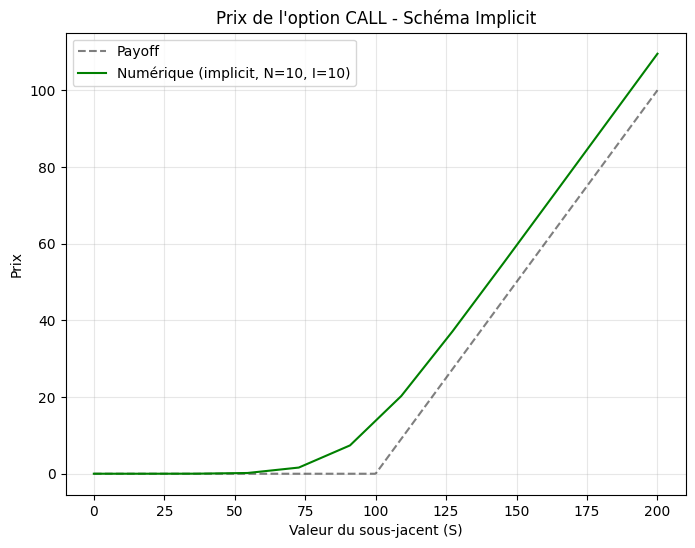

In [22]:
#plot_results_call(implicit_euler_call, N, I, "Euler implicite")
pricer_call = BlackScholesPricer(Smin=Smin, Smax=Smax, K=K, T=T, r=r, sigma=sigma, option_type='call')
plot_single_result(pricer_call, N=10, I=10, method='implicit')

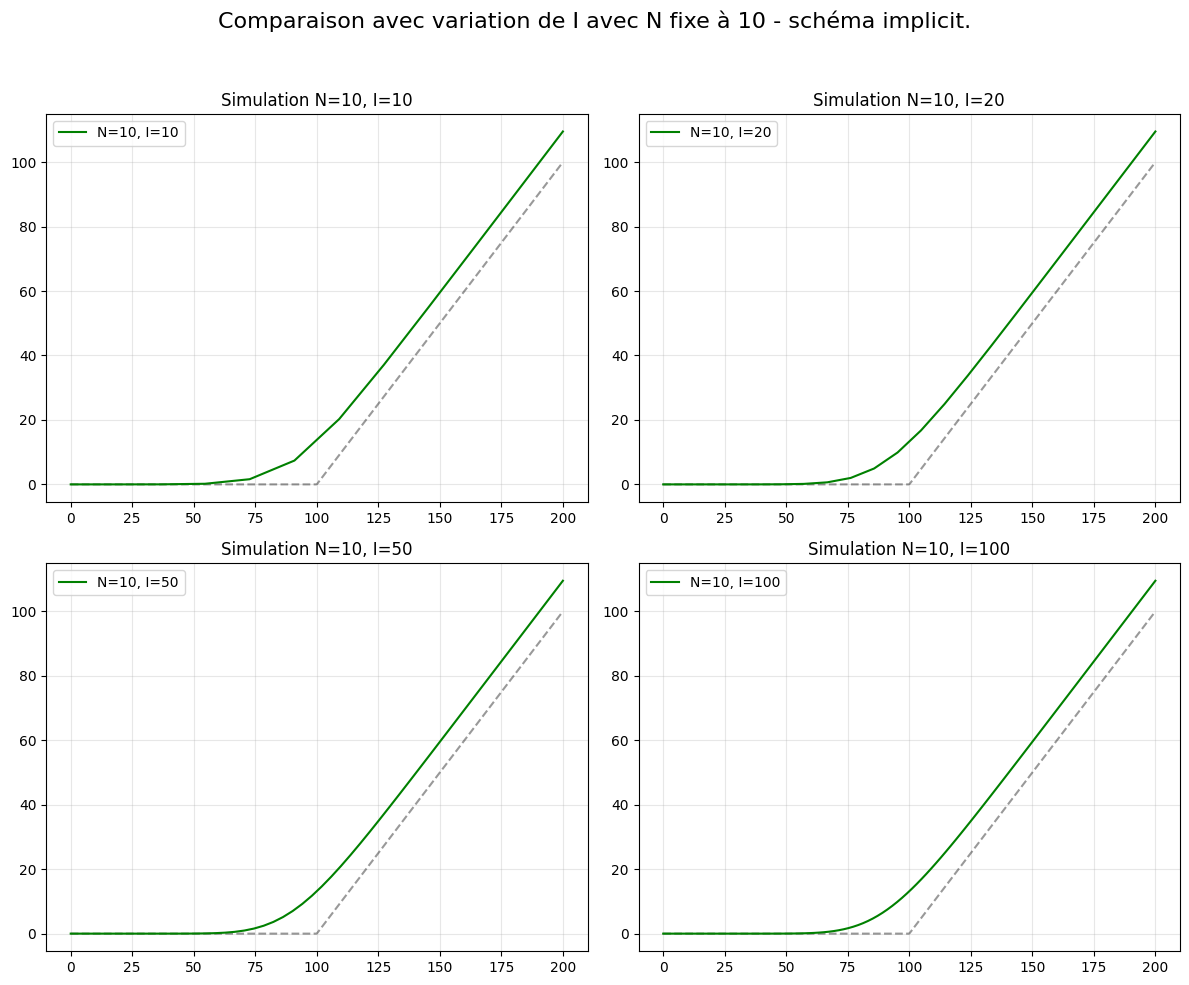

In [23]:
plot_four_graphs(pricer_call, params, method='implicit', title="Comparaison avec variation de I avec N fixe à 10 -")

**Commentaire:** On peut voir que comme dans le cas du Put le schéma d'euler implicite est encore stable numériquement. 